# 09 - Improved Fraud Detection

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model


In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

We will be using the Credit Card Fraud Detection data set available at https://www.kaggle.com/mlg-ulb/creditcardfraud.   The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

This data set is of interest precisely because it is unbalanced, since it is like the distribution that is typical in a Tax Administration, where the vast majority of taxpayers are not defrauding the Tax Administration. We are likely to see a similar distribution.



In [3]:
file = tf.keras.utils
raw_df = pd.read_csv('creditcard.csv')
raw_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
raw_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
cleaned_df = raw_df.copy()

# We don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)


We have a data set with 284,807 labeled data points.  We will use 80% of this data to train our models, and we use the remaining 20% to test and validate our models.  Since the data set is unbalanced, we need a sufficiently large set for the Test set, so an 80-2o split seems reasonable.

Use a utility from sklearn to split and shuffle our dataset

In [6]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)


Examine the data


In [7]:
neg_tot, pos_tot = np.bincount(raw_df['Class'])
total_tot = neg_tot + pos_tot
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_tot, pos_tot, 100 * pos_tot / total_tot))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [8]:
# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0

val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

If our data set has some numbers in widely different scales, our models will not work, since variables that have very large range will overpower variables that have smaller ranges.  For this, we scale the data.

We scale each variable by calculating:

z = (x - u) / s

where u is the mean of the training samples, and s is the standard deviation of the training samples.

In [9]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

Our data should have a mean of zero and a standard deviation of 1. 

In [10]:
pd.DataFrame(train_features).describe()

0             1             2             3             4   \
count  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05   
mean   3.547334e-18  1.153858e-17  1.075895e-17 -4.853221e-18  8.186156e-19   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -2.877441e+01 -4.405964e+01 -3.186230e+01 -4.016416e+00 -8.218647e+01   
25%   -4.699958e-01 -3.639245e-01 -5.866650e-01 -5.978935e-01 -5.006631e-01   
50%    8.560921e-03  3.762032e-02  1.170432e-01 -1.349674e-02 -3.933106e-02   
75%    6.726400e-01  4.844404e-01  6.767723e-01  5.255318e-01  4.422698e-01   
max    1.252875e+00  1.336232e+01  6.184322e+00  1.192599e+01  2.514798e+01   

                 5             6             7             8             9   \
count  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05   
mean  -2.163484e-18  6.022672e-18  9.160698e-19  7.796339e-19  1.912052e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -1.959067e+01 -3.486229e+01 -6.040498e+01 -1.218661e+01 -2.242742e+01   
25%   -5.750812e-01 -4.427632e-01 -1.715028e-01 -5.849807e-01 -4.894689e-01   
50%   -2.057612e-01  3.310250e-02  1.910936e-02 -4.764896e-02 -8.619758e-02   
75%    2.976175e-01  4.571505e-01  2.710514e-01  5.414085e-01  4.110980e-01   
max    5.489135e+01  9.652011e+01  1.616098e+01  1.414657e+01  2.165719e+01   

       ...            19            20            21            22  \
count  ...  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05   
mean   ... -4.931184e-18 -3.898169e-18 -3.314419e-17 -3.898169e-20   
std    ...  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min    ... -7.007886e+01 -4.683519e+01 -1.504041e+01 -5.845469e+01   
25%    ... -2.742552e-01 -3.063782e-01 -7.459427e-01 -2.594183e-01   
50%    ... -8.217067e-02 -3.805228e-02  1.061790e-02 -1.927469e-02   
75%    ...  1.700479e-01  2.514673e-01  7.279516e-01  2.341696e-01   
max    ...  5.068814e+01  3.658150e+01  1.445355e+01  3.591077e+01   

                 23            24            25            26            27  \
count  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05  1.822760e+05   
mean  -8.575973e-18 -1.822394e-17 -8.575973e-18 -6.704851e-18 -5.087111e-18   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -4.698831e+00 -1.357104e+01 -5.387225e+00 -5.534780e+01 -4.636806e+01   
25%   -5.861108e-01 -6.093212e-01 -6.784673e-01 -1.727165e-01 -1.588232e-01   
50%    6.577541e-02  3.093603e-02 -1.067509e-01  3.950430e-03  3.425738e-02   
75%    7.238344e-01  6.728445e-01  4.988878e-01  2.248837e-01  2.358923e-01   
max    7.586573e+00  1.441006e+01  7.268727e+00  7.753933e+01  1.017153e+02   

                 28  
count  1.822760e+05  
mean   3.370552e-16  
std    1.000003e+00  
min   -4.865318e+00  
25%   -6.038537e-01  
50%    7.372278e-02  
75%    6.949707e-01  
max    3.562479e+00  

[8 rows x 29 columns]

We remove outliers to train our model.  

In [11]:
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

In [12]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


In [13]:
def plotConfusion(test_labels, predictions_baseline, p):
    cm = confusion_matrix(test_labels, predictions_baseline > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(0.5))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    truePositives = cm[1][1]
    trueNegatives = cm[0][0]
    falsePositives = cm[0][1]
    falseNegatives = cm[1][0]
    
    precision = truePositives / (truePositives + falsePositives)
    recall = truePositives / (truePositives + falseNegatives)
    f1ScoreCalculated =  2 * (precision * recall) / (precision + recall)
    
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1 Score Calculated: {:.4f}'.format(f1ScoreCalculated))
    
    

A confusion matrix and an F1 score are better mechanisms for measuring the effectiveness of the model.    A confusion matrix allows us to visualize how many True Negatives, False Positives, False Negatives and True Positives we have.  100% accuracy would mean 0 False Negatives and 0 False Positives.

We can also use Precision, Recall and F1 scores. 

Precision is the proportion of positive identifications that was actually correct.  

Recall is the proportion of actual positives that was identified correctly.

F1 score is a single metric that is useful if you're looking for a balance between precision and recall and there's an uneven class distribution. The formula for F1 is $F_{1}=\frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$



In [14]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

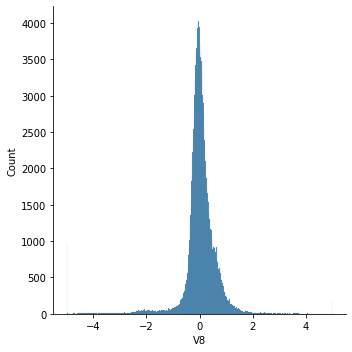

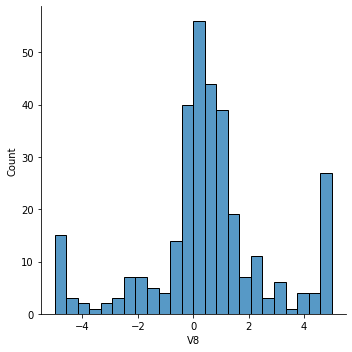

In [15]:
sns.displot(neg_df['V8'])
sns.displot(pos_df['V8'])

Text(0.5, 0.98, 'Negative distribution')

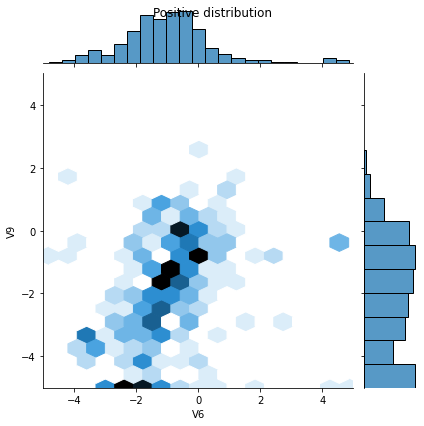

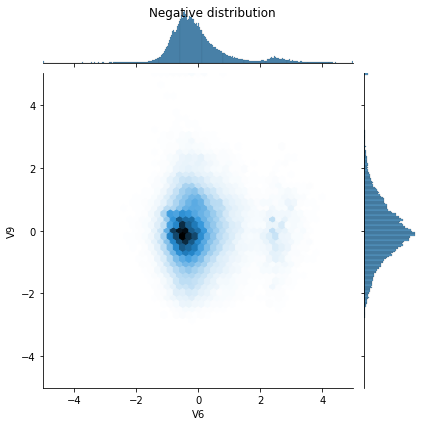

In [16]:
sns.jointplot(x=pos_df['V6'], y=pos_df['V9'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['V6'], y=neg_df['V9'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Negative distribution")

In [17]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [18]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

medium_model2 = keras.Sequential(
    [
        layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1, activation='sigmoid')
    ]
)

medium_model2.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=METRICS
)

medium_results2 = medium_model2.fit(train_features, train_labels, batch_size=4096, epochs = 50, verbose=2, validation_data=(test_features, test_labels))

C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50


C:\Users\Ivan Krsul\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


45/45 - 3s - loss: 0.2341 - tp: 0.0000e+00 - fp: 23.0000 - tn: 181929.0000 - fn: 324.0000 - accuracy: 0.9981 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.2828 - prc: 0.0011 - val_loss: 0.1507 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 56865.0000 - val_fn: 97.0000 - val_accuracy: 0.9983 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.3848 - val_prc: 0.0012
Epoch 2/50
45/45 - 1s - loss: 0.1327 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 181952.0000 - fn: 324.0000 - accuracy: 0.9982 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7584 - prc: 0.4049 - val_loss: 0.1158 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 56865.0000 - val_fn: 97.0000 - val_accuracy: 0.9983 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.9418 - val_prc: 0.6635
Epoch 3/50
45/45 - 1s - loss: 0.1056 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 181952.0000 - fn: 324.0000 - accuracy: 0.9982 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8965 - prc: 0.6559 - 

Epoch 23/50
45/45 - 1s - loss: 0.0094 - tp: 244.0000 - fp: 31.0000 - tn: 181921.0000 - fn: 80.0000 - accuracy: 0.9994 - precision: 0.8873 - recall: 0.7531 - auc: 0.9358 - prc: 0.7372 - val_loss: 0.0083 - val_tp: 81.0000 - val_fp: 14.0000 - val_tn: 56851.0000 - val_fn: 16.0000 - val_accuracy: 0.9995 - val_precision: 0.8526 - val_recall: 0.8351 - val_auc: 0.9634 - val_prc: 0.8011
Epoch 24/50
45/45 - 1s - loss: 0.0089 - tp: 245.0000 - fp: 29.0000 - tn: 181923.0000 - fn: 79.0000 - accuracy: 0.9994 - precision: 0.8942 - recall: 0.7562 - auc: 0.9342 - prc: 0.7245 - val_loss: 0.0079 - val_tp: 83.0000 - val_fp: 14.0000 - val_tn: 56851.0000 - val_fn: 14.0000 - val_accuracy: 0.9995 - val_precision: 0.8557 - val_recall: 0.8557 - val_auc: 0.9685 - val_prc: 0.8042
Epoch 25/50
45/45 - 1s - loss: 0.0085 - tp: 244.0000 - fp: 31.0000 - tn: 181921.0000 - fn: 80.0000 - accuracy: 0.9994 - precision: 0.8873 - recall: 0.7531 - auc: 0.9358 - prc: 0.7426 - val_loss: 0.0074 - val_tp: 81.0000 - val_fp: 14.0000 

Epoch 45/50
45/45 - 1s - loss: 0.0054 - tp: 249.0000 - fp: 29.0000 - tn: 181923.0000 - fn: 75.0000 - accuracy: 0.9994 - precision: 0.8957 - recall: 0.7685 - auc: 0.9359 - prc: 0.7402 - val_loss: 0.0045 - val_tp: 80.0000 - val_fp: 14.0000 - val_tn: 56851.0000 - val_fn: 17.0000 - val_accuracy: 0.9995 - val_precision: 0.8511 - val_recall: 0.8247 - val_auc: 0.9583 - val_prc: 0.8082
Epoch 46/50
45/45 - 1s - loss: 0.0054 - tp: 245.0000 - fp: 29.0000 - tn: 181923.0000 - fn: 79.0000 - accuracy: 0.9994 - precision: 0.8942 - recall: 0.7562 - auc: 0.9329 - prc: 0.7452 - val_loss: 0.0045 - val_tp: 80.0000 - val_fp: 14.0000 - val_tn: 56851.0000 - val_fn: 17.0000 - val_accuracy: 0.9995 - val_precision: 0.8511 - val_recall: 0.8247 - val_auc: 0.9635 - val_prc: 0.8101
Epoch 47/50
45/45 - 1s - loss: 0.0053 - tp: 244.0000 - fp: 29.0000 - tn: 181923.0000 - fn: 80.0000 - accuracy: 0.9994 - precision: 0.8938 - recall: 0.7531 - auc: 0.9298 - prc: 0.7478 - val_loss: 0.0045 - val_tp: 81.0000 - val_fp: 14.0000 

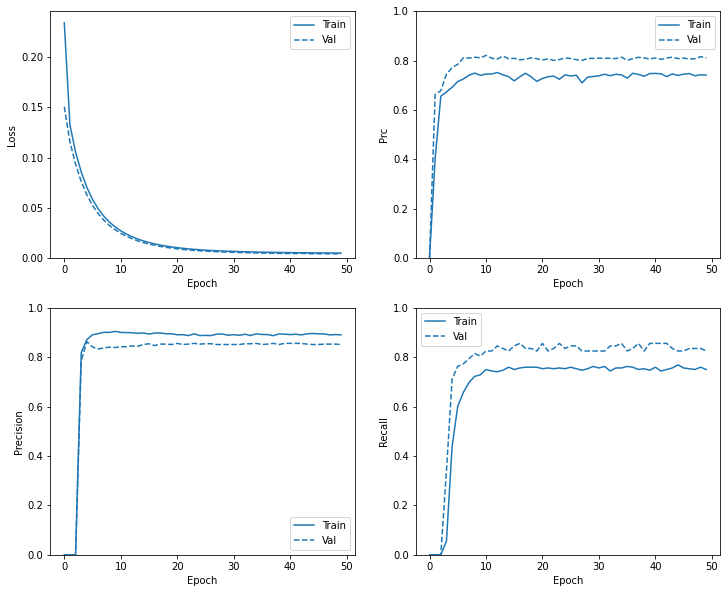

In [19]:
plot_metrics(medium_results2)

In [20]:
medium2_predictions_baseline = medium_model2.predict(test_features, batch_size=4096)

Legitimate Transactions Detected (True Negatives):  56851
Legitimate Transactions Incorrectly Detected (False Positives):  14
Fraudulent Transactions Missed (False Negatives):  17
Fraudulent Transactions Detected (True Positives):  80
Total Fraudulent Transactions:  97
Precision: 0.8511
Recall: 0.8247
F1 Score Calculated: 0.8377


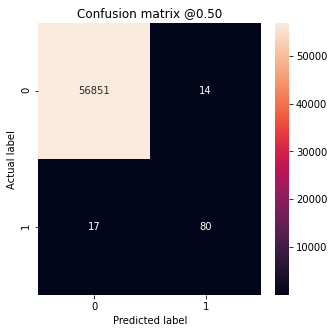

In [21]:
plotConfusion(test_labels, medium2_predictions_baseline, 0.5)